# Exercise Sheet 3

Leon Oleschko and Aurel Müller-Schoenau  
9.12.2022

In [25]:
#imports

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math

## Exercise 1

Bessel functions are defined as follows:

$ J_m(r) = \frac{1}{\pi}\int_0^\pi \cos(m\cdot \theta - r \sin \theta) \text{d}\theta$

with $m \in \N$.

The tasks:

- Calculate $J_0(x),\, J_1(x),\, J_2(x)$ for $x\in [0,20]$, using the trapezoidal rule with $N=100$ sub-steps.

- Plot the results alongside the Bessel implementations from the library scipy: ```scipy.special.j0()```, etc.

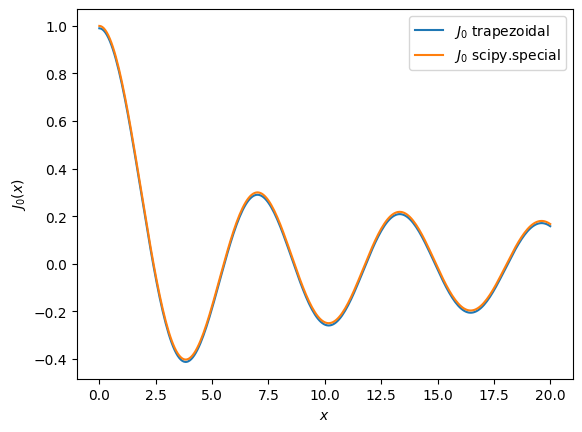

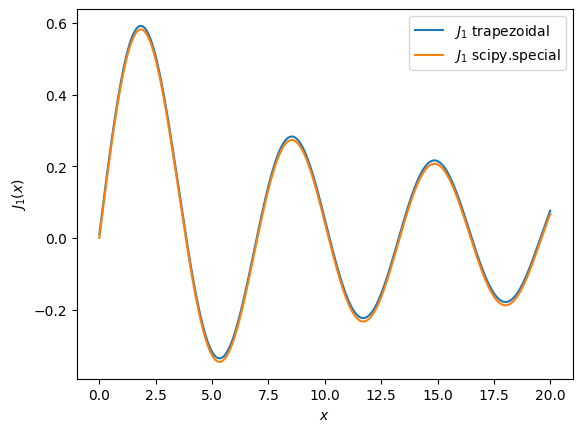

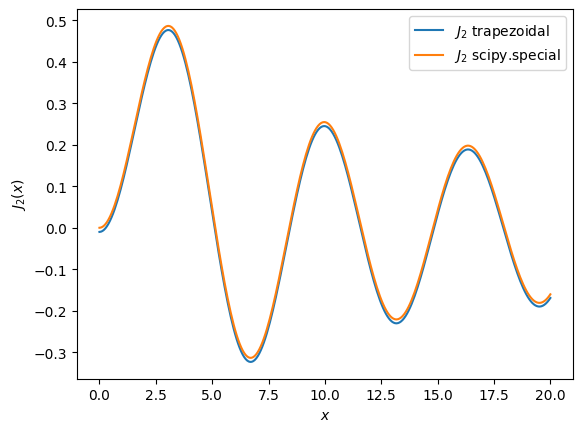

In [26]:
m_values = [0,1,2]
N = 100
x_min = 0
x_max = 20


# define function inside bessel integral
def f(m, x, theta):
    return np.cos(m*theta - x*np.sin(theta))


# define bessel function
def bessel(m, x):
    bessel_value = 0
    theta_step = math.pi / N

    for i in range(0,N-1):
        # trapezoidal rule
        bessel_value += theta_step/2 * (f(m,x,i*theta_step) + f(m,x,(i+1)*theta_step))
    
    return bessel_value/math.pi


# plot bessel functions
x = np.linspace(x_min, x_max, 300)
plt.gca().set_prop_cycle(None) # reset the colors

for m in m_values:

    # plot trapezoidal rule result
    plt.plot(x, bessel(m,x), label='$J_{}$ trapezoidal'.format(m))
    
    # plot scipy implementation
    plt.plot(x, sp.jv(m,x), label='$J_{}$ scipy.special'.format(m))
    
    plt.xlabel("$x$");
    plt.ylabel("$J_{}(x)$".format(m))
    plt.legend()
    plt.show()



Trapezoidal rule integration yields sufficiently accurate results compared to the ```scipy``` implementations.

Final task of the exercise:

- Plot the diffraction pattern of a pinhole for different wavelengths

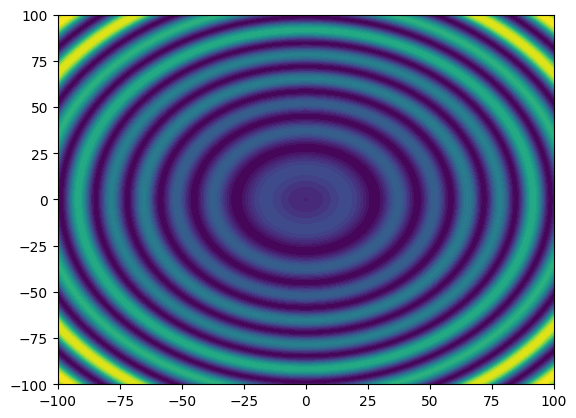

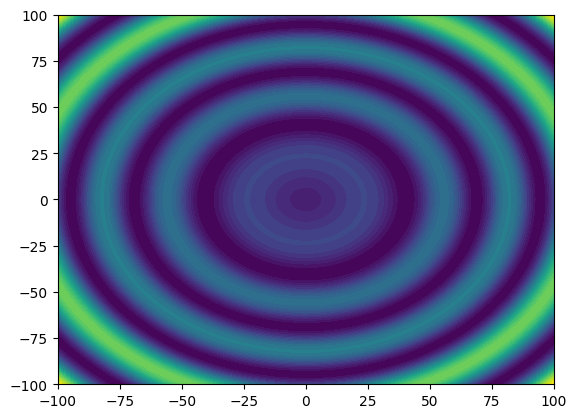

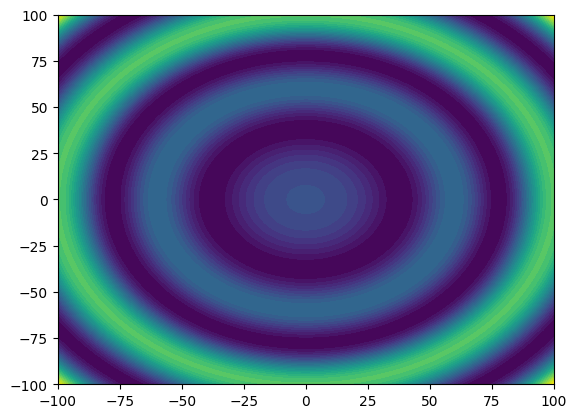

In [27]:
# parameters
a = 10 # radius of the pinhole
q = 100 # distance between pihole and screen
lambda_values = [1,2,3] # wavelengths

def lambda_to_k(wavelength):
    return 2*math.pi/wavelength


#k_values = [lambda_to_k(lambda) for lambda in lambda_values] # this yields an error and i don't know why
k_values = [lambda_to_k(wavelength) for wavelength in lambda_values]

# diffraction pattern (radial)
def diffraction_pattern(x,y,k):
    r = k*a*q/(math.pi*np.sqrt(x**2+y**2+q**2))
    return (2 * bessel(1,math.pi * r) / (math.pi * r))**2

x = np.linspace(-100,100,300)
y = np.linspace(-100,100,300)

X,Y = np.meshgrid(x,y)

# plot the pattern for the chosen values
for k in k_values:
    Z = diffraction_pattern(X,Y,k)
    levels = np.linspace(Z.min(),Z.max(),30)
    plt.contourf(X,Y,Z,levels=levels)
    plt.show()

## Exercise 4

The wave functions of the harmonic oscillator are

$\psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} \exp\left(\frac{-x^2}{2}\right)H_n(x)$

where

$H_0(x) = 1$
$H_1(x) = 2x$
$H_{n+1} := 2xH_n(x) - 2nH_{n-1}(x)$

Tasks:

- Calculate $H_0,\dots,H_{30}$ using ```sympy``` and plot $H_0,\dots,H_3$.

H_0 = 1
H_1 = 2*x
H_2 = 4*x**2 - 2
H_3 = 8*x**3 - 12*x
H_4 = 16*x**4 - 48*x**2 + 12
H_5 = 32*x**5 - 160*x**3 + 120*x
H_6 = 64*x**6 - 480*x**4 + 720*x**2 - 120
H_7 = 128*x**7 - 1344*x**5 + 3360*x**3 - 1680*x
H_8 = 256*x**8 - 3584*x**6 + 13440*x**4 - 13440*x**2 + 1680
H_9 = 512*x**9 - 9216*x**7 + 48384*x**5 - 80640*x**3 + 30240*x
H_10 = 1024*x**10 - 23040*x**8 + 161280*x**6 - 403200*x**4 + 302400*x**2 - 30240
H_11 = 2048*x**11 - 56320*x**9 + 506880*x**7 - 1774080*x**5 + 2217600*x**3 - 665280*x
H_12 = 4096*x**12 - 135168*x**10 + 1520640*x**8 - 7096320*x**6 + 13305600*x**4 - 7983360*x**2 + 665280
H_13 = 8192*x**13 - 319488*x**11 + 4392960*x**9 - 26357760*x**7 + 69189120*x**5 - 69189120*x**3 + 17297280*x
H_14 = 16384*x**14 - 745472*x**12 + 12300288*x**10 - 92252160*x**8 + 322882560*x**6 - 484323840*x**4 + 242161920*x**2 - 17297280
H_15 = 32768*x**15 - 1720320*x**13 + 33546240*x**11 - 307507200*x**9 + 1383782400*x**7 - 2905943040*x**5 + 2421619200*x**3 - 518918400*x
H_16 = 65536*x**16 - 3932

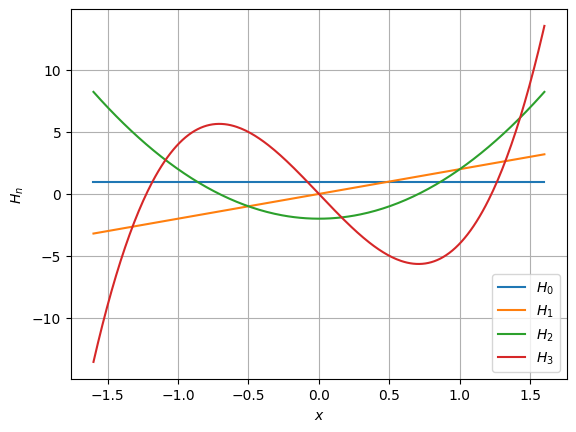

In [28]:
import sympy as sym

x = sym.symbols("x")


H_0 = 1 + 0*x
H_1 = 2*x

# recursion
def H_rec(H_a, H_b, n):
    return sym.simplify(2*x*H_b - 2*(n-1)*H_a)

# evaluate expressions by substituting x
def eval_function(f,eval_range):
    return [(f.subs(x,x_val)).evalf() for x_val in x_range]

# plotting
x_range = np.linspace(-1.6,1.6,300)

# initialize recursion
H_a, H_b = H_0, H_1

# print H_0, H_1
print("H_0 = " + format(H_a))
print("H_1 = " + format(H_b))

plt.plot(x_range, eval_function(H_a,x_range), label='$H_0$')
plt.plot(x_range, eval_function(H_b,x_range), label='$H_1$')

# find H_2, H_3, ..., H_30
for n in range(2,31):
    # recursion formula
    H_c = H_rec(H_a,H_b,n)

    # shift everything over for next iteration
    H_a, H_b = H_b, H_c

    # print H_n
    print("H_{} = ".format(n) + format(H_c))

    # if n <= 3, plot H_n(x)
    if n <= 3:
        plt.plot(x_range, eval_function(H_c,x_range), label='$H_{}$'.format(n))
    
plt.xlabel("$x$");
plt.ylabel("$H_n$")
plt.grid(True)
plt.legend()
plt.show()



- plot the wave function $\psi_n(x)$ for $n = 0,1,2,3,30$ for $x \in [-10,10]$

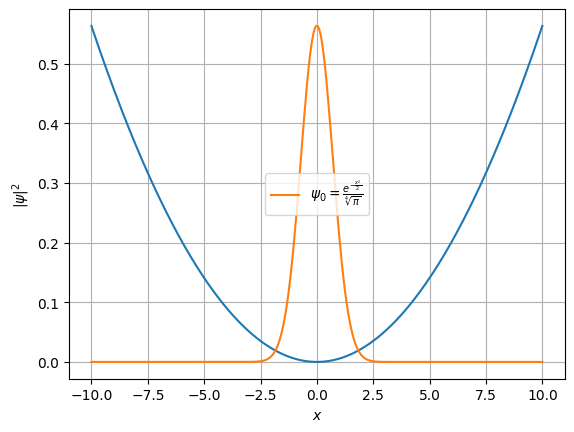

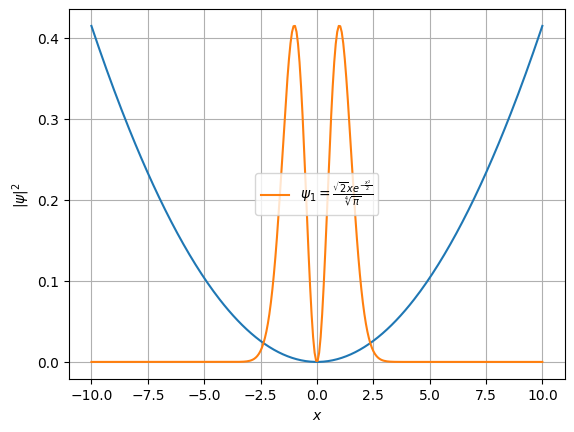

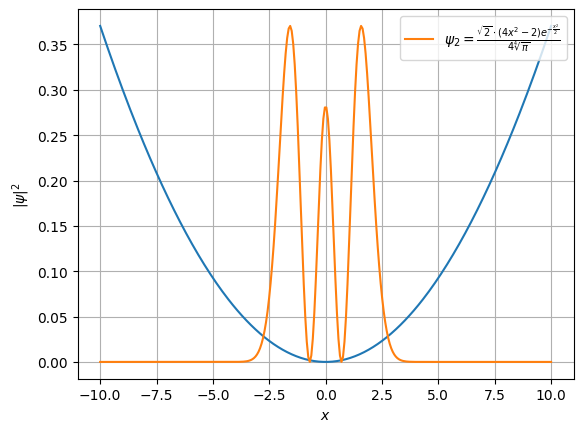

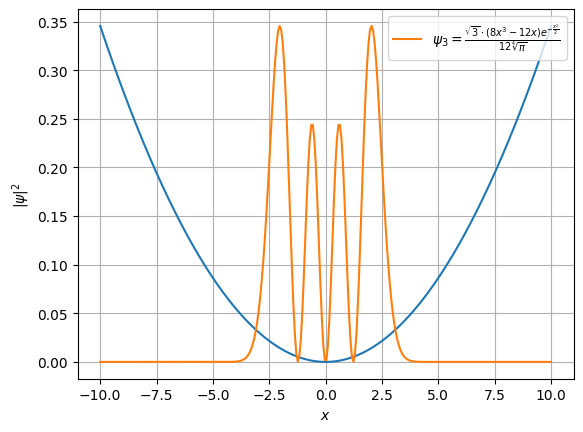

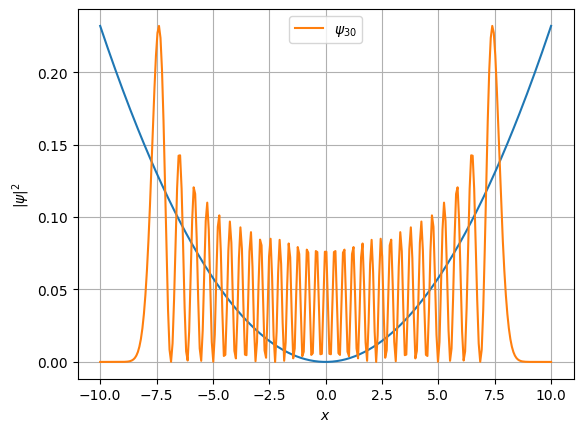

In [32]:
n,pi = sym.symbols("n pi")
n_vals = [0,1,2,3,30]
x_range = np.linspace(-10,10,300)

# calculate H_n
def H_n(n_val):
    H_a, H_b = H_0, H_1
    if n_val == 0:
        return H_a
    if n_val == 1:
        return H_b
    for i in range(2,n_val+1):
        H_c = H_rec(H_a,H_b,i)
        H_a, H_b = H_b, H_c
    return H_c


# plot functions for chosen n values
for n_val in n_vals:
    psi = 1/(sym.sqrt(2**n_val * sym.factorial(n_val) * sym.sqrt(pi))) * sym.exp(-x**2/2) * H_n(n_val)
    label_string = "=" + format(sym.latex(psi)) + "$"
    if n_val >= 10:
        label_string = "$"
    Z = eval_function(sym.Abs(psi.subs(pi,math.pi))**2,x_range)
    plt.plot(x_range, (x_range/10)**2*max(Z))
    plt.plot(x_range, Z, label='$\psi_' + "{" + format(n_val) + "}" + label_string)
    plt.xlabel("$x$");
    plt.ylabel("$|\psi|^2$")
    plt.grid(True)
    plt.legend()
    plt.show() 

- Calculate the uncertainty $\sqrt{\langle x^2 \rangle}$ for $n = 0,5$ with

$ \langle x^2 \rangle = \int_{-\infty}^\infty x^2 | \psi_n(x) |^2 \text{d}x$

In [30]:
n_vals = [0,5]
N = 100 # integration steps
x_max = 10 # 10 \approx \infty, see previous part of ex. 4
x_step = 2 * x_max / N

# integration using trapezoid formula
def integrate(term):
    int_value = 0
    for i in range(0,N):
        x_val = -x_max + i*x_step
        f_a = term.subs(x,x_val).evalf()
        f_b = term.subs(x,x_val + x_step).evalf()
        int_value += x_step / 2 * (f_a + f_b)
    return int_value

for n_val in n_vals:
    psi = 1/(sym.sqrt(2**n_val * sym.factorial(n_val) * sym.sqrt(pi))) * sym.exp(-x**2/2) * H_n(n_val)
    term_to_integrate = x**2 * sym.Abs(psi)**2

    # calculate uncertainty according to above formula
    uncert = math.sqrt(integrate(term_to_integrate.subs(pi,math.pi)))
    print("Uncertainty for n={}: ".format(n_val) + format(round(uncert,5)))


Uncertainty for n=0: 0.70711
Uncertainty for n=5: 2.34521
